**For all the F.R.I.E.N.D.S. and Data Lovers!!**

In [1]:
# import the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the plot size
plt.rcParams['figure.figsize'] = (10,5)

In [3]:
# read the data
df_friends = pd.read_csv('friends_dataset.csv')

# check the first five observations
df_friends.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


In [4]:
# check the number of observations
df_friends.shape

(235, 8)

In [5]:
# check the data type of each variable
df_friends.dtypes

Year_of_prod       int64
Season             int64
Episode_Title     object
Duration           int64
Summary           object
Director          object
Stars            float64
Votes              int64
dtype: object

The data type of `Season` is integer. But by the data definition, it is the season identifier; thus it should be categoric.

In [6]:
# change the data type of 'Season'
df_friends.Season = df_friends.Season.astype('object')

In [7]:
# recheck the data type
df_friends.dtypes

Year_of_prod       int64
Season            object
Episode_Title     object
Duration           int64
Summary           object
Director          object
Stars            float64
Votes              int64
dtype: object

Now all the variables have an appropriate data type.


### Summary Statistics
Let us check the summary statistics for each numeric variable.

In [8]:
# use 'describe()' to get the summary for numeric variables
df_friends.describe()

,Year_of_prod,Duration,Stars,Votes
count,235.000000,235.000000,235.000000,235.000000
mean,1998.982979,22.340426,8.459574,3352.285106
std,2.831396,1.517372,0.397029,824.214570
min,1994.000000,22.000000,7.200000,2557.000000
25%,1997.000000,22.000000,8.200000,2885.500000
50%,1999.000000,22.000000,8.400000,3147.000000
75%,2001.000000,22.000000,8.700000,3579.500000
max,2004.000000,30.000000,9.700000,10381.000000


The above output shows that on average the duration of episode is 22.34 minutes. The average star rating is 8.46. Also there are no missing values in the numeric variables.


### Exploratory Analysis

We can have various questions by looking at the dataset like for how many years the show was being produced? How many seasons are there? Which is the highest rated episode? and so on. We analyze each of the variable in this section. 

#### In which year the show was produced?

In [9]:
# use the 'unique()' to find the production years
df_friends.Year_of_prod.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
      dtype=int64)

The output shows that the shows was produced between years 1994-2004.

#### How many seasons of F.R.I.E.N.D.S. are there?

In [10]:
# find the unique count of seasons
df_friends.Season.nunique()

10

The series is divided into 10 different seasons.

#### In which year the highest number of episodes were produced?

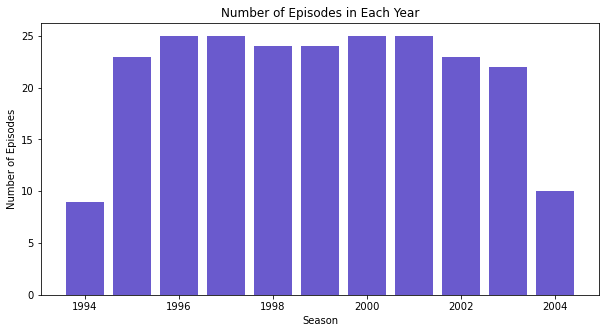

In [11]:
# use a pivot table to find the number of episodes produced in each year
table = df_friends.pivot_table(values='Season', index='Year_of_prod', aggfunc='count')

# plot a bar plot to visualize the number of episodes
plt.bar(x = table.index, height = table.Season, color = 'slateblue')

# add the title and axes labels
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes in Each Year')

plt.show()

We can see that the in the years 1996, 1997, 2000, and 2001 maximum (= 25) episodes were produced. In 1994 there are only 9 episodes.

#### In which year the episode with longest duration was produced?

In [12]:
# print the inforamtion of episode with longest duration
df_friends[df_friends['Duration'] == df_friends['Duration'].max()]

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
94,1998,4,The One with Ross's Wedding,30,Phoebe tries to help Rachel deal with her feel...,Kevin Bright,8.7,3343
95,1998,4,The One with Ross's Wedding,30,Phoebe tries to warn the gang that Rachel is c...,Kevin Bright,9.2,4217
134,2000,6,The One That Could Have Been,30,When Rachel hears Barry and Mindy are getting ...,Michael Lembeck,8.5,3097
135,2000,6,The One That Could Have Been,30,The gang continue to think about how different...,Michael Lembeck,8.5,3037
143,2000,6,The One with the Proposal,30,Chandler's plan to propose to Monica at dinner...,Kevin Bright,8.8,3065
144,2000,6,The One with the Proposal,30,Chandler continues to pretend to hate the idea...,Kevin Bright,9.3,4186
233,2004,10,The Last One,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
234,2004,10,The Last One,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


Majority of the episode with longest duration (30 min) were produced in 2000. Those episodes were from the season 6.
We can see that the episode titles are repetitive; this is maybe because there are two or more parts of the single episode.

#### What is the total duration (in minutes) of each season?

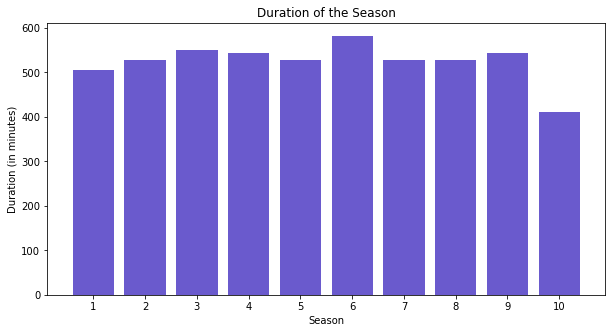

In [13]:
# use a pivot table to find the total duration of each season
table = df_friends.pivot_table(values='Duration', index='Season', aggfunc='sum')

# plot the bar plot to visualize the longest and shortest running season
plt.bar(x = table.index, height = table.Duration, color = 'slateblue')

# set the x-axis labels 
plt.xticks(ticks=np.arange(1,11), labels=np.arange(1,11))

# add the title and axes labels
plt.xlabel('Season')
plt.ylabel('Duration (in minutes)')
plt.title('Duration of the Season')

plt.show()

The above plot shows that the 6th season was the longest running season and the shortest was the 10th season. The plot shows that all the seasons except the last one have duration of at least 500 minutes.

#### In which year the highest number of directors have worked on the show?

In [14]:
# create an empty dictionary to store the number of directors worked in each year
yr_dir = {}

# use for loop to calculate the number of directors worked 
for year in df_friends['Year_of_prod'].unique():
    num_dir = df_friends[df_friends['Year_of_prod'] == year]['Director'].nunique()
    # create a pair of key and value
    pair = {year:num_dir}
    yr_dir.update(pair)

# print the dictionary
print(yr_dir)

{1994: 4, 1995: 10, 1996: 8, 1997: 11, 1998: 9, 1999: 9, 2000: 5, 2001: 6, 2002: 6, 2003: 6, 2004: 3}


In 1997, total 25 episodes were produced for which 11 directors have worked. Also, all the episodes in the year 2004 were produced by the 3 different directors.

#### Which director has worked in most of the seasons?

In [15]:
# create an empty list to store the list of directors for each season
all_dir = []
for i in df_friends.Season:
    
    # create a list of directors
    s_dir = df_friends[df_friends['Season'] == i]['Director'].to_list()
    
    # append the list of directors in each season to the empty list
    all_dir.append(s_dir)

In [16]:
# take the intersection of all the lists in 'all_dir'
set(all_dir[0]).intersection(*all_dir[1:])

{'Kevin Bright'}

OH MY GOD! `Kevin Bright` is the only director who has worked on all the seasons of the show.

#### Find the number of episodes directed by each director

In [17]:
# use a pivot table to find the average rating for each director
df_friends.pivot_table(values='Episode_Title', index='Director', aggfunc='count')

,Episode_Title
Director,
Alan Myerson,2
Andrew Tsao,1
Arlene Sanford,1
Ben Weiss,10
Dana De Vally Piazza,3
David Schwimmer,10
David Steinberg,1
Ellen Gittelsohn,1
Gail Mancuso,14


It can be seen that most of the directors have directed only 1 or 2 episodes. Most of the episodes were directed by `Kevin Bright` and `Gary Halvorson`. The output shows that our `Dinosaur Guy` i.e. Dr. Ross Geller (David Schwimmer) has directed total 10 episodes on the show.😃 

#### Visualize the average stars received in each season

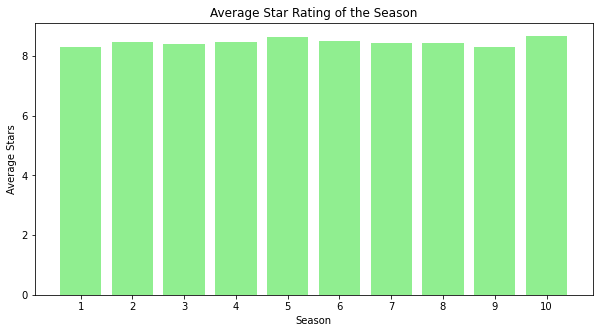

In [18]:
# use a pivot table to find the average star rating of each season
table = df_friends.pivot_table(values='Stars', index='Season', aggfunc='mean')

# plot the bar plot to visualize the average stars for each season
plt.bar(x = table.index, height = table.Stars, color = 'lightgreen')

# set the x-axis labels 
plt.xticks(ticks=np.arange(1,11), labels=np.arange(1,11))

# add the title and axes labels
plt.xlabel('Season')
plt.ylabel('Average Stars')
plt.title('Average Star Rating of the Season')

plt.show()

All the seasons have average rating greater than 8. The last season (10th season) received highest average stars.

#### Find out the episode with the lowest rating?

In [19]:
# episode with lowest rating
df_friends[df_friends['Stars'] == df_friends['Stars'].min()]

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
92,1998,4,The One with the Invitation,22,As Ross and Emily send out wedding invitations...,Peter Bonerz,7.2,3364


The episode in the 4th season produced in 1998 got the lowest rating as 7.2. It can be seen that this episode was not well received by the audience. The output shows that the this episode was directed by Peter Bonerz.

#### Visualize the average votes in each season

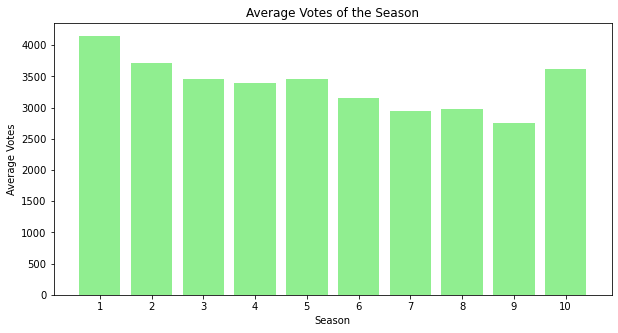

In [20]:
# use a pivot table to find the average votes of each season
table = df_friends.pivot_table(values='Votes', index='Season', aggfunc='mean')

# plot the bar plot to visualize the average votes for each season
plt.bar(x = table.index, height = table.Votes, color = 'lightgreen')

# set the x-axis labels 
plt.xticks(ticks=np.arange(1,11), labels=np.arange(1,11))

# add the title and axes labels
plt.xlabel('Season')
plt.ylabel('Average Votes')
plt.title('Average Votes of the Season')

plt.show()

First season of the series received the highest number of average votes.

#### Top 5 episodes in terms of stars rating

In [21]:
# sort the dataframe based on the star rating
sort_eps = df_friends.sort_values(by = 'Stars', ascending = False)

# check the top 5 episodes 
sort_eps.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
234,2004,10,The Last One,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381
109,1999,5,The One Where Everybody Finds Out,22,When Phoebe finds out about Monica and Chandle...,Michael Lembeck,9.7,8066
233,2004,10,The Last One,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
83,1998,4,The One with the Embryos,22,Phoebe's uterus is examined for implantation o...,Kevin Bright,9.5,6006
36,1996,2,The One with the Prom Video,22,The gang watches a home video from the night o...,James Burrows,9.4,5736


Here we can see that there are 2 episodes with the same title `The Last One`. It can be seen that these are the 2 parts on the same episode. Thus we rename the title for 233rd observation as `The Last One-I` and title of 234th episode as `The Last One-II`.

In [22]:
# rename the title of 233rd episode
df_friends.iloc[233, 2] = 'The Last One-I'

# rename the title of 234th episode
df_friends.iloc[234, 2] = 'The Last One-II'

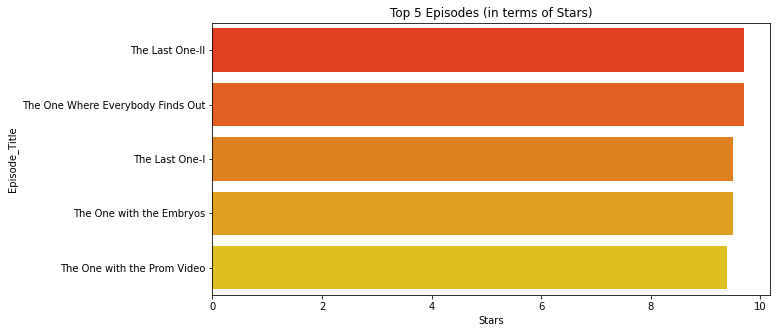

In [23]:
# sort the dataframe based on the star rating
sort_eps = df_friends.sort_values(by = 'Stars', ascending = False)

# plot the ratings of top 5 episodes
sns.barplot(y = sort_eps.Episode_Title[0:5], x = sort_eps.Stars[0:5], orient = 'h', palette = 'autumn', errwidth=0)

# add plot title
plt.title('Top 5 Episodes (in terms of Stars)')

plt.show()

The series finale is the highest rated episode along with the episode where everybody finds out about Monica and Chandler.

#### Top 5 episodes in terms of votes

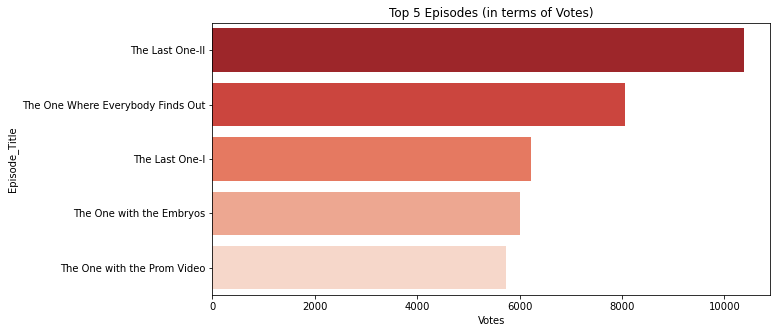

In [24]:
# sort the dataframe based on the votes
sort_eps = df_friends.sort_values(by = 'Votes', ascending = False)

# plot the ratings of top 5 episodes
sns.barplot(y = sort_eps.Episode_Title[0:5], x = sort_eps.Votes[0:5], orient = 'h', palette = 'Reds_r', errwidth=0)

# add plot title
plt.title('Top 5 Episodes (in terms of Votes)')

plt.show()

We can see that top 5 episodes in terms of star rating are also the top 5 episodes in terms of votes. The last episode of the series received more than 10000 votes!!

## Thanks for reading!